In [243]:
import os
import cv2
import json
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

# 1. 기존 데이터

In [244]:
input1_path = glob('./input/data/ICDAR17_Korean/images/*')
with open('input/data/ICDAR17_Korean/ufo/train.json', 'r') as j:
    input1_annot = json.load(j)

In [247]:
folder_path = './box_input1'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

folder_saved = glob(folder_path + '/*')
folder_saved = [i.split('/')[-1] for i in folder_saved]

for img_path in tqdm(input1_path, total=len(input1_path)):
    fname = img_path.split('/')[-1]

    if fname in folder_saved:
        continue


    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ann_info = input1_annot['images'][fname]
    
    words = ann_info['words']
    for i in words.keys():
        color = (0, 255, 0)
        
        w_info = words[i]

        if w_info['illegibility']:
            color = (255, 0, 0)

        points = w_info['points']
        points = np.array(points, np.int32).reshape((-1, 1, 2))

        text = w_info['transcription']

        # (x1, y1), (x2, y2) = points[0], points[2]

        cv2.polylines(image, [points], True, color, 5)


    h, w = image.shape[:2]
    h2, w2 = h//2, w//2
    image_resized = cv2.resize(image, dsize=(w2, h2), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(f'{folder_path}/{fname}',cv2.cvtColor(image_resized, cv2.COLOR_RGB2BGR))

100%|██████████| 536/536 [00:53<00:00, 10.08it/s]


# 2. 추가로 받은 데이터

In [248]:
input2_path = glob('./input2/images/*')
with open('input2/ufo/train.json', 'r') as j:
    input2_annot = json.load(j)

In [249]:
len(input2_annot['images'])

1288

In [252]:
folder_path = './box_input2'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
folder_saved = glob(folder_path + '/*')
folder_saved = [i.split('/')[-1] for i in folder_saved]

for img_path in tqdm(input2_path, total=len(input2_path)):
    
    fname = img_path.split('/')[-1]
    
    if fname in folder_saved:
        continue
    
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ann_info = input2_annot['images'][fname]
    
    words = ann_info['words']
    for i in words.keys():
        color = (0, 255, 0)
        w_info = words[i]

        if w_info['illegibility']:
            color = (255, 0, 0)

        points = w_info['points']
        points = np.array(points, np.int32).reshape((-1, 1, 2))

        text = w_info['transcription']

        # (x1, y1), (x2, y2) = points[0], points[2]

        cv2.polylines(image, [points], True, color, 5)

        # cv2.putText(image, text, (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
        # print(text)

    h, w = image.shape[:2]
    h2, w2 = h//2, w//2
    image_resized = cv2.resize(image, dsize=(w2, h2), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(f'{folder_path}/{fname}',cv2.cvtColor(image_resized, cv2.COLOR_RGB2BGR))

100%|██████████| 1288/1288 [11:25<00:00,  1.88it/s]


In [251]:
len(glob('box_input2/*'))

1288

In [232]:
input2_path = glob('./input2/images/*')
with open('input2/ufo/train.json', 'r') as j:
    input2_annot = json.load(j)

In [237]:
img_path = [i for i in input2_path if '1632648324272-27' in i][0]

In [241]:
fname = img_path.split('/')[-1]

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

ann_info = input2_annot['images'][fname]

words = ann_info['words']

for i in words.keys():
    color = (0, 255, 0)
    w_info = words[i]

    if w_info['illegibility']:
        color = (255, 0, 0)

    points = w_info['points']
    points = np.array(points, np.int32).reshape((-1, 1, 2))

    text = w_info['transcription']

    cv2.polylines(image, [points], True, color, 5)


h, w = image.shape[:2]
h2, w2 = h//4, w//4
image_resized = cv2.resize(image, dsize=(w2, h2), interpolation=cv2.INTER_CUBIC)

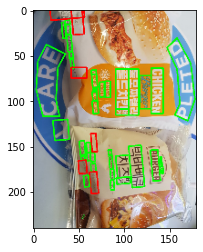

In [242]:
plt.imshow(image_resized)